# Проект: "Исследование рынка компьютерных игр"

**В проекте выполнен анализ рынка компьютерных игр по данным о продажах, оценках пользователей и экспертов, а также жанрах и платформах, на которых выходили игры. Данные взяты из открытых источников.** 

**Цель анализа - выявить определяющие успешность игры закономерности, чтобы интернет-магазин смог сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год**

**Данные представлены датасетом `games.csv`, в котором хранится информация об играх, вышедших до 2016 года включительно. В датасете содержатся следующие столбцы:**

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию (например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»).

**План выполнения проекта:**

**1. Ознакомиться с данными в предоставленными в датасете, проверить, что они содержат заявленную информацию**

**2. Выполнить предобработку данных:** 
- привести названия столбцов к snake_case;
- преобразовать данные в нужные типы и описать, почему было выполнено это преобразование;
- обработать пропуски данных (с объяснением, почему были выполнены/не выполнены те или иные замены пропусков) и описать возможные причины пропусков;
- отдельно разобрать значение 'tbd' в столбце с оценкой пользователей и описать, как его обработать;
- рассчитать суммарные продажи во всех регионах и записать в отдельный столбец.
**3. Выполнить исследовательский анализ данных:**
- оценить, сколько игр выпускалось за разны годы, и важны ли для нас данные за все периоды;
- оценить, как менялись продажи по платформам **за актуальный для прогноза период**; выяснить, за какое время появляются новые и исчезают старые платформы;
- проверить какие платформы лидируют по продажам, растут или падают; выбрать несколько потенциально прибыльных платформ.
- построить boxplot по глобальным продажам игр в разбивке по платформам и описать результат;
- посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сделать выводы. Соотнести выводы с продажами на других платформах.
- посмотреть на распределение игр по жанрам, выделить самые прибыльные жанры. Оценить, выделяются ли жанры с высокими и низкими продажами.
**4. Составить портрет пользователя для каждого региона (NA, EU, JP):**
- описать самые популярные платформы и различия в долях продаж по платформам;
- описать самые популярные жанры и пояснить разницу;
- оценить, влияет ли рейтинг ESRB на продажи в отдельном регионею
**5. Проверить гипотезы, самостоятельно задав пороговое значение alpha:**
- cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- cредние пользовательские рейтинги жанров Action и Sports разные.
Пояснить как были сформулированы нулевая и альтернативная гипотезы, какой критерий применялся для проверки гипотез и почему.

**6. Сделать общий вывод**

## Первичный обзор датасета
**Импортируем библиотеки, необходимые для работы:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Загрузим данные из csv-файла в датафрейм `df`:**

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Проверим, какая доля значений пропущена для каждого из столбцов датафрейма `df`:**

In [6]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


**В датафрейме 11 столбцов и 16715 строк. Судя по информации, пропущенных значений нет в столбцах о продажах по регионам, столбце `Other_Sales` и `Platform`, в других столбцах есть пропуски. Больше всего пропусков в `Critic_Score` (более 50%). В столбцах `User_Score` и `Rating_Score` пропущены около 40% значений. Кроме того, столбец `Year_of_Release` имеет тип `float64`, и его нужно будет привести к типу `int`. Также у `User_Score` тип `object`, а должен быть `float64`. Рейтинг ESRB буквенный, поэтому тип `object` для него подходит.**

**Проверим, есть ли в датафрейме явные дубликаты:**

In [7]:
df.duplicated().sum()

0

**Явных дубликатов не обнаружено. Перейдем к предобработке данных.**

## Предобработка данных

### Переименование столбцов
**Приведем названия столбцов датафрейма к snake_case:**

In [8]:
df.columns = ['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [9]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование типов данных

**Приведем столбец `year_of_release` к типу данных `int`, поскольку год выпуска игры - это целое число:**

In [10]:
df['year_of_release'] = np.floor(pd.to_numeric(df['year_of_release'],errors='coerce')).astype('Int64')

In [11]:
df['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [12]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Посмотрим, какие уникальные значения содержит столбец `user_score`:**

In [13]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

**Похоже, что рейтинг пользователей может принимать значения от 0 до 10.0 с шагом 0.1, т.е. его правильно привести к типу `float`. Однако, есть еще значения `nan` и `tbd`. Первое, вероятно, связано с отсутствием информации о рейтинге, а второе с тем, что информация о рейтинге уточняется - to be determined. В любом случае, к настоящему моменту мы не имеем данных рейтинга ни для игр, помеченных `nan`, ни для `tbd`. Поэтому приведем столбец `user_score` к типу `float` c параметром errors = 'coerce'. Это действие превратит все `nan` и `tbd` в `nan`**

**Приведем столбец `user_score` к типу `float`, т.к. рейтинг пользователей может принимать значения от 0.0 до 10.0 (с десятыми долями):**

In [14]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [15]:
df['user_score'].dtype

dtype('float64')

In [16]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

**Рейтинг критиков, напротив, выражается целым числом от 0 до 100, поэтому приведем столбец `critic_score` к типу `int`:**

In [17]:
df['critic_score'] = np.floor(pd.to_numeric(df['critic_score'],errors='coerce')).astype('Int64')

In [18]:
df['critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   35,   41,   36,   28,   31,   27,   26,   19,   23,
   24,   21,   17,   22,   13]
Length: 83, dtype: Int64

**Посмотрим информацию о типах данных в датафрейме, чтобы ничего не упустить:**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### Проверка столбцов на наличие неявных дубликатов

**Проверим, нет ли в столбцах `platform`, `genre` и  `rating` неявных дубликатов - одних и тех же значений, записанных разными способами:**

In [20]:
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [21]:
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [22]:
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

**Обратимся к внешним источникам и расшифруем рейтинги ESRB:**

AO - только для лиц старше 18 лет;

E - для всех возрастных категорий;

E10+ - для лиц старше 10 лет;

EC - для детей от 3 лет;

**K-A - значит "kids-to-adults" - старое название рейтинга E10+ (фактически дубликат E10+);**

M - для лиц старше 17 лет;

RP - рейтинг ожидается (еще не присвоен);

T - для лиц старше 13 лет;

**Заменим все значения `K-A` в столбце `rating` на `E10+`:**

In [23]:
df['rating'] = df['rating'].replace('K-A','E10+')

In [24]:
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'M', 'RP', 'T', nan], dtype=object)

**Замена прошла успешно**

**Проверим, есть ли в датасете игры, у которых полностью совпадают название, платформа и год выпуска:**

In [25]:
df[df[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E


**Такие игры есть, это Madden NFL 13, вышедшая на платформе PS3 в 2012 году и неизвестная игра для SEGA 1993 года. Игра для сеги будет удалена из датасета на этапе удаления пропущенных значений в столбце `name`, а для Madden NFL лучшим выбором будет убрать из датасета вторую строку, где она упоминается, т.к. в ней явно не хватает данных о продажах, а рейтинги критиков, пользователей и рейтинг ESRB совпадают с первым упоминанием игры.**

In [26]:
df = df.drop(index=16230).reset_index(drop=True)

### Обработка пропущенных значений

**Еще раз посмотрим в каких столбцах есть пропущенные значения:**

In [27]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

**Поскольку данные взяты из открытых источников, причиной пропусков может быть:**
- человеческий фактор (люди, которые собирали датасет, по какой-то причине не нашли данные, или их могло просто не быть в наличии в открытом доступе)
- рейтинги критиков и пользователей, а также рейтинг ESRB могут отсутствовать для игр, которые были выпущены до того, как были созданы данные рейтинги. Кроме того, рейтинг ESRB является обязательным только для региона NA (Канада и США), поэтому пропуски этого рейтинга в других регионах могут возникать по причине того, что эти рейтинги там не нужны для осуществления продаж игр

**Выведем строки, в которых пропущено название игры:**

In [28]:
df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


**Это две неизвестные нам игры, выпущеные для SEGA в 1993-м году. Маловероятно что эти данные понадобятся для нашего анализа. Удалим их, создав новое название для датасета, с которым будем продолжать работу:**

In [29]:
df_work = df.query('~name.isna()')
len(df_work)

16712

In [30]:
df_work.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


**В датасете есть данные об играх с пропущенным годом выпуска. Посмотрим, на каких платформах они выпускались, и актуальны ли эти данные для нашего исследования:**

In [31]:
df_work.query('year_of_release.isna()')['platform'].sort_values().unique()

array(['2600', '3DS', 'DS', 'GB', 'GBA', 'GC', 'N64', 'PC', 'PS', 'PS2',
       'PS3', 'PSP', 'PSV', 'Wii', 'X360', 'XB'], dtype=object)

**Платформы разные, некоторые крайне актуальны до сих пор (например PC), другие - давно отжившие (например 2600 - Atari). Зайдем с другой стороны, посмотрим каковы суммарные продажи по играм с пропущенным годом выпуска и какую долю они составляют от продаж игр по всему датасету. Для Северной Америки:**

In [32]:
df_work.query('year_of_release.isna()')['na_sales'].sum()/df_work['na_sales'].sum()

0.013441440540657233

**Для Европы:**

In [33]:
df_work.query('year_of_release.isna()')['eu_sales'].sum()/df_work['eu_sales'].sum()

0.010090217933856683

**Для Японии:**

In [34]:
df_work.query('year_of_release.isna()')['jp_sales'].sum()/df_work['jp_sales'].sum()

0.005164413338060956

**Для других стран:**

In [35]:
df_work.query('year_of_release.isna()')['other_sales'].sum()/df_work['other_sales'].sum()

0.01088165411253223

**Во всех регионах доли продаж игр с пропущенным годом выпуска составляют не более 1.4 %. Думаю, можно от них избавиться, тем более, что простых способов заменить или восстановить эти данные нет:**

In [36]:
df_work = df_work.query('~year_of_release.isna()')

In [37]:
df_work.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

<**Теперь подумаем, что делать с пропусками в `critic_score`, `user_score`. Эти показатели очень сильно зависят от свойств конкретной игры, а не от жанра, или платформы, на которой эта игра вышла. Поэтому, чтобы не исказить данные, не будем заменять или удалять пропущенные значения в этих столбцах. Что касается рейтинга ESRB (столбец `rating`) -  разумно будет заменить пропущенные значения в этом рейтинге на `unknown`, поскольку данный рейтинг применяется в регионе NA, и в других регионах он может быть пропущен ввиду того, что его просто не присваивают играм**

In [38]:
df_work['rating'] = df_work['rating'].fillna('unknown')
df_work['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

### Создание столбца с суммарными продажами по всем регионам
**Для удобства последующей работы создадим в датафрейме `df_work` столбец `world_sales`, в котором будут записаны данные по суммарным продажам игры во всех регионах:**

In [39]:
df_work['world_sales'] = df_work['na_sales'] + df_work['eu_sales'] + df_work['jp_sales'] + df_work['other_sales']

In [40]:
df_work.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38


**В завершении предобработки сделаем reset_index и посмотрим как изменился наш рабочий датафрейм:**

In [41]:
df_work = df_work.reset_index(drop=True)
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  world_sales      16443 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.5+ MB


**Размер датасета уменьшился незначительно: с 16715 до 16443 строк. Пропущенные значения, как мы и планировали, остались только в столбцах `critic_score`, `user_score`. Также добавили один столбец с суммарными продажами по всем регионам - `world_sales`.**

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы?

**Создадим сводную таблицу, в которой отразим количество выпущенных игр по годам, представленым в датасете:**

In [42]:
pivot_games_by_year = df_work.pivot_table(index='year_of_release', values='name', aggfunc='count')
pivot_games_by_year.columns=['num_of_games']
pivot_games_by_year.head()

,num_of_games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


**Построим столбчатую диаграмму:**

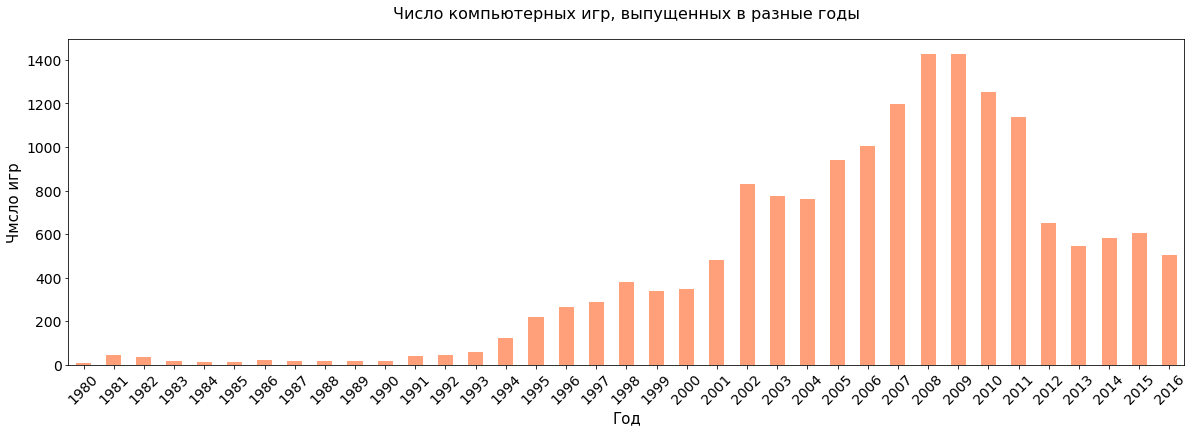

In [43]:
pivot_games_by_year.plot(y='num_of_games', kind='bar', color='lightsalmon', legend=None, figsize=(20,6))
plt.title(label='Число компьютерных игр, выпущенных в разные годы', loc='center', fontsize=16, fontweight='regular', pad=20)
plt.ylabel('Чмсло игр', fontsize=15)
plt.xlabel('Год', fontsize=15)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**В датасете представлены данные об играх, выходивших с 1980 по 2016 год. В период с 1980 по 1993 годы число выпускаемых игр не превышало 100 в год, затем начался плавный рост, количества выпускаемых игр, с пиком в районе 2008-2009 годов. После этого момента начался спад, что, возможно, было связано с усложнением самих игр и возросшими трудозатратами на создание одной игры.** 

**Вероятнее всего, в нашем анализе нам понадобятся данные только за несколько последних лет, поскольку игровые платформы имеют ограниченный срок жизни и со временем сменяются новыми. Таким образом, данные, которые слишком далеко от момента времени, в который проводится анализ, не могут быть использованы для выявления потенциально успешных жанров/платформ и игр в будущем. Для того, чтобы понять каков актуальный период, данные из которого можно использовать для прогноза, необходимо оценить характеристическое время жизни игровых платформ. Этим мы и займемся в следующем пункте.**

### Как по годам менялись продажи игр разных игровых платформ? 

**Для ответа на этот вопрос создадим сводную таблицу, в которой рассчитаем суммарные продажи игр, вышедших на каждой из платформ по годам:**

In [44]:
pivot_platform = df_work.pivot_table(index='platform', columns='year_of_release', values='world_sales', aggfunc='sum')
pivot_platform

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Добавим в таблицу столбец `all_years` с продажами по каждой платформе за все годы:**

In [45]:
pivot_platform['all_years'] = pivot_platform.sum(axis=1)

**Отсортируем таблицу по убыванию продаж за все годы:**

In [46]:
pivot_platform = pivot_platform.sort_values(by='all_years', ascending=False)
pivot_platform.head()

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,all_years
platform,,,,,,,,,,,,,,,,,,,,,
PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,1233.56
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,118.52,130.93,142.17,156.78,107.35,113.25,47.76,16.82,3.60,931.33
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,802.78


**Удалим столбец `all_years`:**

In [47]:
pivot_platform = pivot_platform.drop('all_years',axis=1)

**Построим распределения количества проданных копий игр для 10 наиболее популярных игровых платформ по годам:**

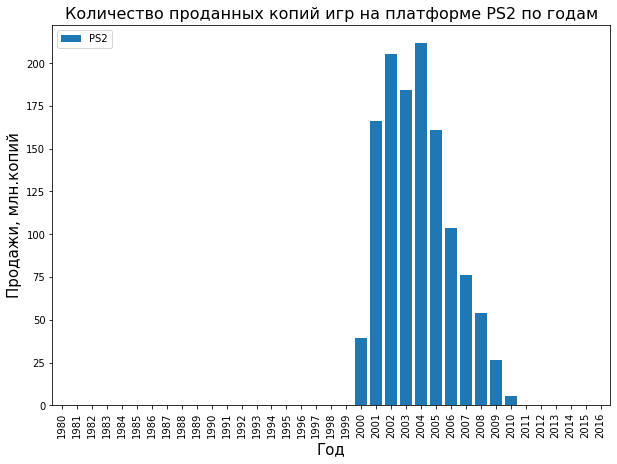

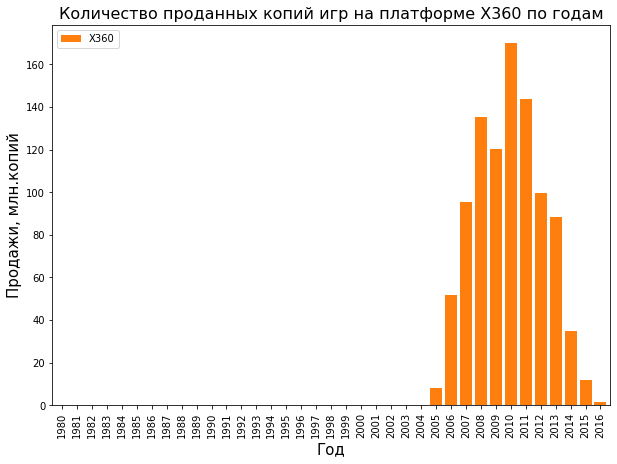

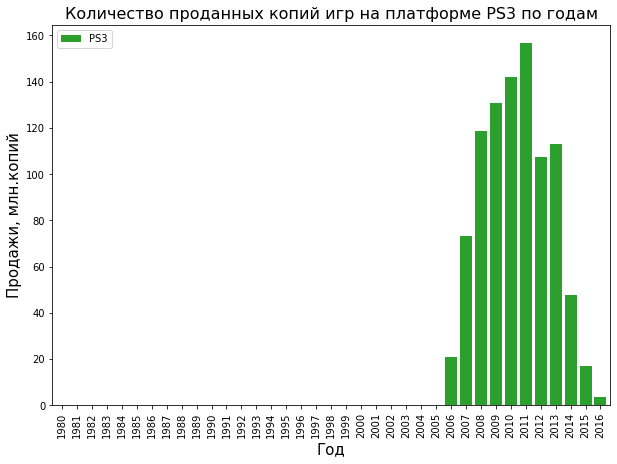

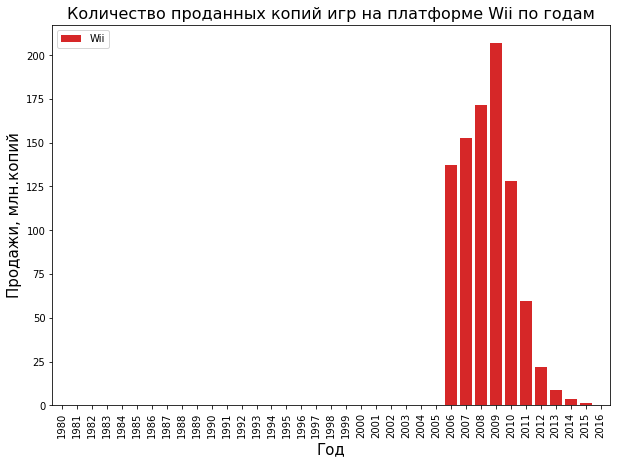

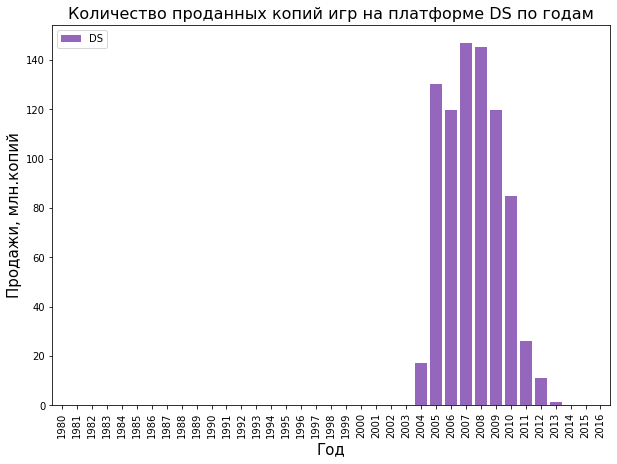

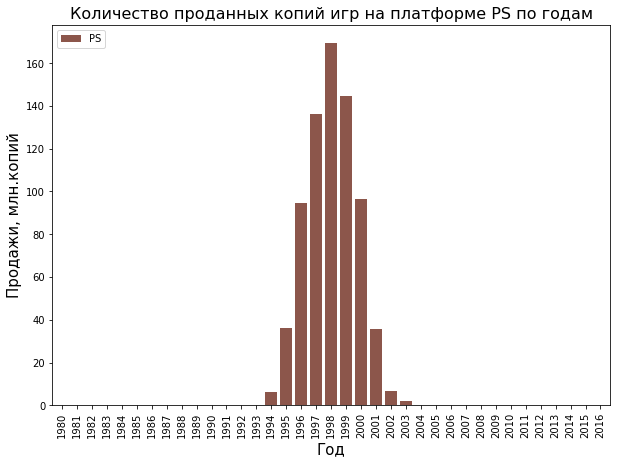

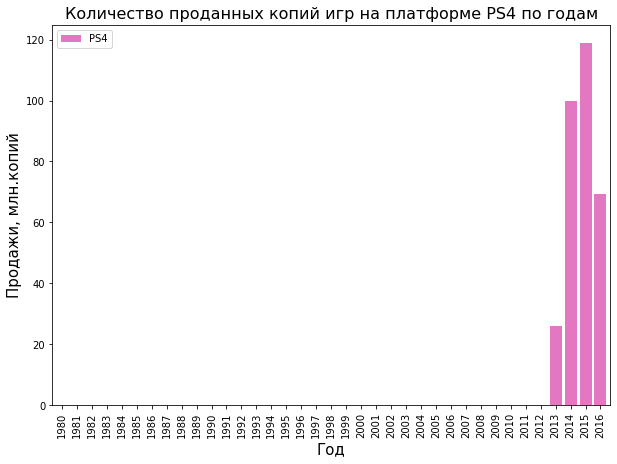

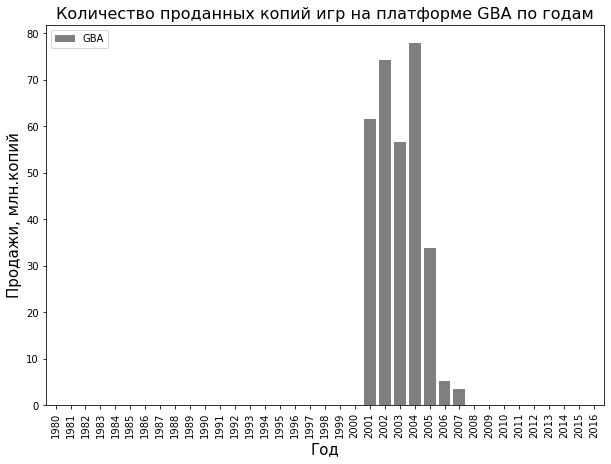

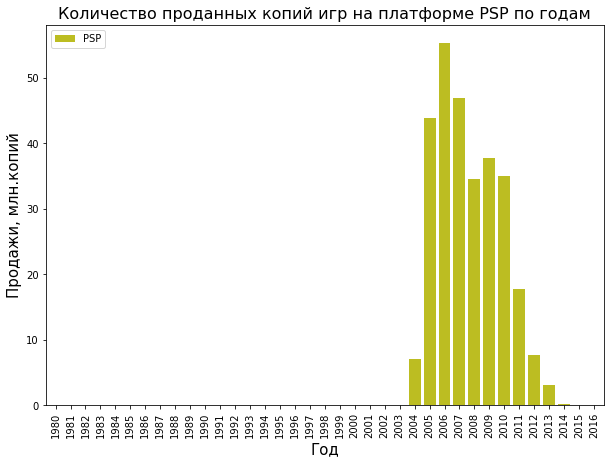

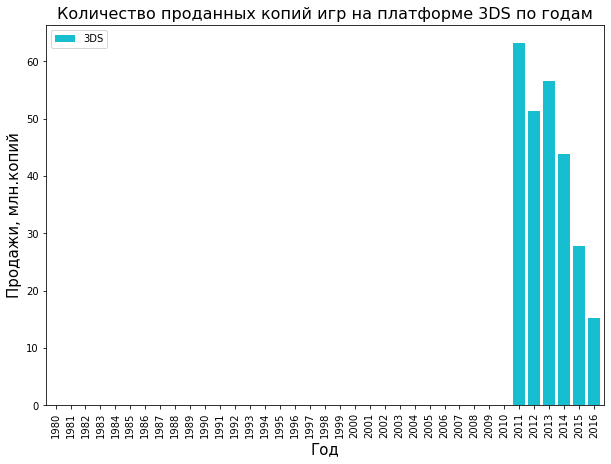

In [48]:
i=0
colors = sns.color_palette("tab10")
for platform in pivot_platform.index[0:10]:
    ax=pivot_platform.loc[platform,:].plot(kind='bar',label=platform, figsize=(10,7), color = colors[i], grid=False, width=0.8)
    i = i + 1
    plt.xlabel('Год', fontsize=15)
    plt.ylabel('Продажи, млн.копий', fontsize=15)
    plt.title(f'Количество проданных копий игр на платформе {platform} по годам', fontsize=16)
    plt.legend(loc="upper left")
    plt.show()

**Рассчитаем, в течение скольких лет продавались игры каждой из платформ:**

In [49]:
years_active = 37-pivot_platform.isna().sum(axis=1)
years_active

platform
PS2     12
X360    12
PS3     11
Wii     11
DS      11
PS      10
PS4      4
GBA      8
PSP     12
3DS      6
PC      26
GB      13
XB       9
NES     12
N64      7
SNES    10
GC       7
XOne     4
2600    10
WiiU     5
PSV      6
SAT      6
GEN      5
DC       7
SCD      2
NG       4
WS       3
TG16     1
3DO      2
GG       1
PCFX     1
dtype: int64

**Получим данные о первом годе активности каждой из платформ:**

In [50]:
first_active_year = pivot_platform.apply(pd.Series.first_valid_index, axis=1)
first_active_year

platform
PS2     2000
X360    2005
PS3     2006
Wii     2006
DS      1985
PS      1994
PS4     2013
GBA     2000
PSP     2004
3DS     2011
PC      1985
GB      1988
XB      2000
NES     1983
N64     1996
SNES    1990
GC      2001
XOne    2013
2600    1980
WiiU    2012
PSV     2011
SAT     1994
GEN     1990
DC      1998
SCD     1993
NG      1993
WS      1999
TG16    1995
3DO     1994
GG      1992
PCFX    1996
dtype: int64

**Таким образом, для десяти самых популярных игровых платформ к 2016 году уже не имевших продаж, время жизни составляло 8-12 лет. Для более наглядного представления построим тепловую карту, на которой отметим годы активности каждой платформы, а цветом обозначим число проданных копий игр - чем ярче оттенок - тем больше копий продано. Белое поле означает, что в данный год игры на данной платформе не продавались** 

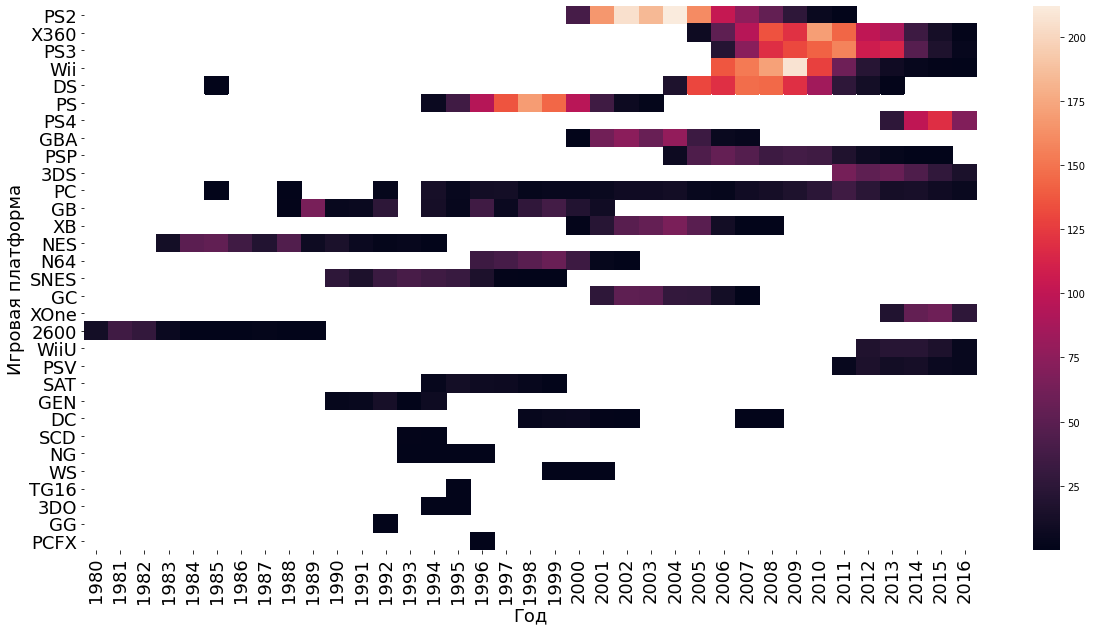

In [51]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(data=pivot_platform, ax=ax, )
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Год', fontsize=18)
plt.ylabel('Игровая платформа', fontsize=18)
plt.show()

**На тепловой карте хорошо видно, что, не смотря на высокую популярность в прошлом, ряд платформ, таких как PS, PS2, DS, GBA, PSP и XB к 2016 гду уже завершил свой жизненный цикл. Такие платформы как X360, PS3, Wii, 3DS к 2016 году еще представлены на рынке, но находятся в фазе спада. Наиболее многообещающе выглядят данные о продажах игр для PS4, которые высоки на 2016 год, а также продажи игр для PC - самой долгоживущей и стабильной платформы из всех. Платформы XOne, WiiU и PSV также занимают свою долю рынка в 2016 году**

**Логично предположить, что в 2017 году могут быть автивны только те платформы, для которых есть продажи на 2016 год. Возможно, появятся и новые, но о них мы из имеющихся данных ничего не можем сказать. Учитывая данные о времени жизни игровых платформ (8-12 лет, за исключением PC), можно также предположить, что платформы X360, PS3 и Wii, каждая из которых к 2016-му году представлена на рынке не менее 11 лет, будут малопопулярны в 2017 году. Таким образом, наиболее многообещающими представляются следующие платформы: PS4, 3DS, PC, XOne, WiiU, PSV.**

### Глобальные продажи игр в 2014-2016 годах в разбивке по платформам

**Создадим датафрейм, в котором оставим только данные за 2014-2016 год:**

In [52]:
df_actual = df_work.query('year_of_release >= 2014').reset_index(drop=True)
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01


**Сначала посчитаем число игр на каждой из платформ, представленных на рынке в 2014-2016 годах и упорядочим их по убыванию:**

In [53]:
quantity = df_actual.pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name',ascending=False)
quantity

,name
platform,
PS4,376
PSV,295
XOne,228
PS3,219
3DS,212
PC,151
X360,111
WiiU,73
PSP,13


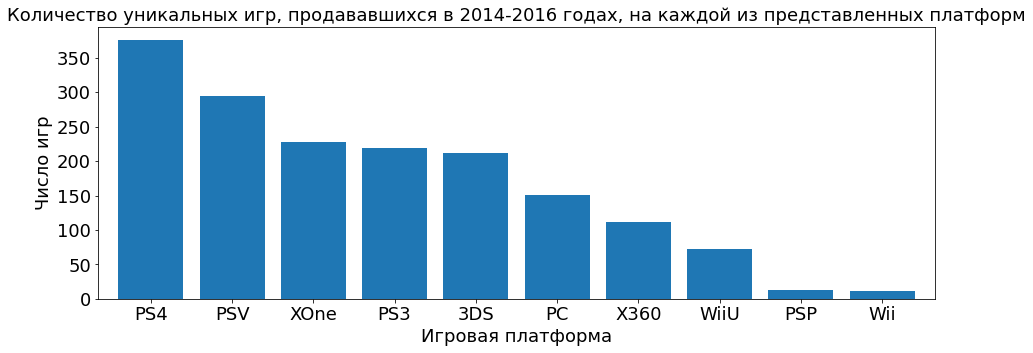

In [54]:
quantity.plot(kind='bar',label=platform, figsize=(15,5), grid=False, width=0.8, legend = False)

plt.xlabel('Игровая платформа', fontsize=18)
plt.ylabel('Число игр', fontsize=18)
plt.title('Количество уникальных игр, продававшихся в 2014-2016 годах, на каждой из представленных платформ', fontsize=18)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18)
plt.show()

**Больше всего игр было представлено для PS4 - 376, меньше всего для Wii - всего 11. Теперь построим боксплоты по глобальным продажам в разбивке по платформам:**

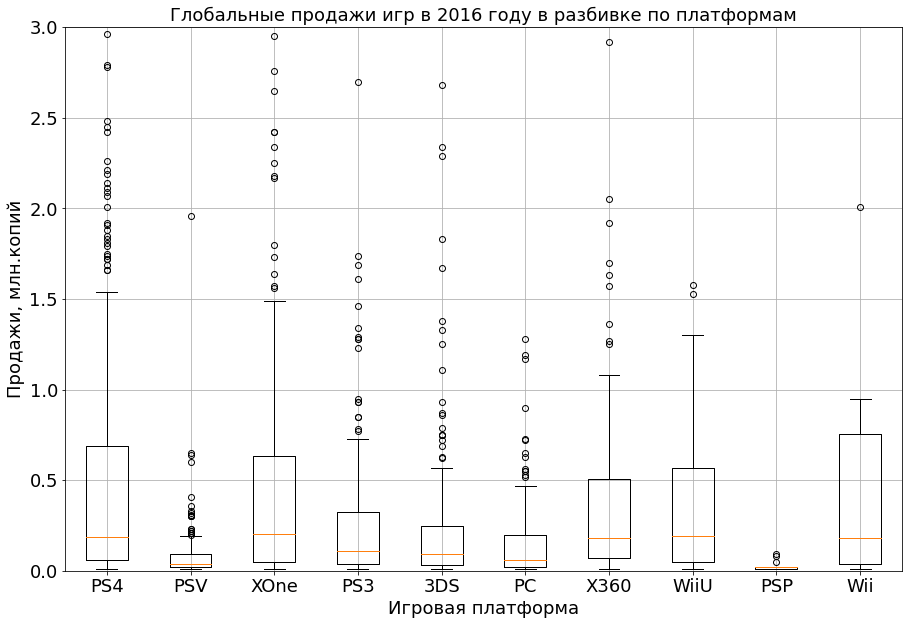

In [55]:
plt.rcParams['figure.figsize']=(15, 10)

data = []
for platform in quantity.index:
    data.append(df_actual[df_actual["platform"] == platform]["world_sales"])

# Вывподим результат
fig, ax = plt.subplots()
ax.set_title('Глобальные продажи игр в 2016 году в разбивке по платформам', fontsize=18)
ax.boxplot(data, labels = quantity.index, showfliers=True)
plt.xlabel('Игровая платформа', fontsize=18)
plt.ylabel('Продажи, млн.копий', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0,3)
plt.grid(True)


plt.show()

**Полученные данные показывают, что медианное число проданных копий игр, выходивших на платформах, активных в 2016 году, не превышало 250 тысяч. Вместе с тем, такие платформы, как PS4, XOne, PS3, 3DS и X360 смогли выпустить игры, которые были распроданы тиражами свыше 2 млн копий. Эти платформы, за исключением PS3, чей жизненный цикл подходит к концу, точно стоит рассматривать в качестве кандидатов на успешные продажи в следующем году. К "середнякам" можно отнести всегда стабильную платформу PC, WiiU а также PSV. PC и PSV не демонстрируют сверхвысоких тиражей игр, однако по количеству выпускаемых игр сопоставимы с XOne. Принимая во внимане явный спад продаж для X360, PS3 и Wii, связанный с завершением цикла жизни этих платформ, что хорошо видно на тепловой карте, представленной выше, эти платформы не стоит рассматривать в качестве потенциально прибыльных на 2017 год**

### Влияние отзывов пользователей и критиков на продажи игр на платформе PS4

**Оценим, как связаны отзывы критиков и пользователей с продажами на популярной платформе PS4. Сформируем датафрейм `ps4_2016`, в который поместим данные об играх на платформе PS4, продававшихся в 2016 году:**

In [56]:
ps4_actual = df_actual.query('platform == "PS4"')
ps4_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,unknown,7.98
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
1627,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69,7.5,unknown,0.01
1629,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01
1636,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01
1637,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51,5.5,M,0.01


**Построим диаграмму рассеяния и вычислим коэффициент корреляции между рейтингом критиков и продажами игр:**

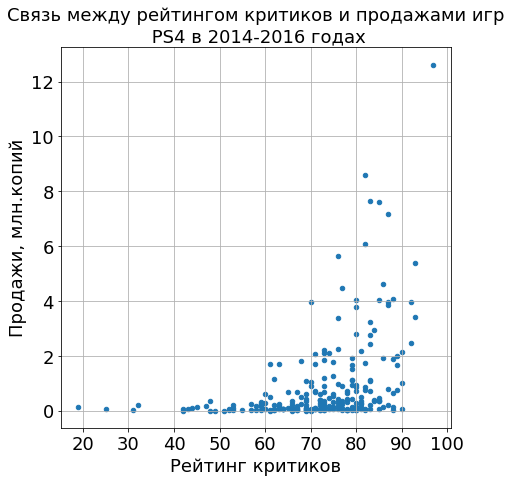

In [57]:
ps4_actual.plot(x='critic_score',y='world_sales', kind='scatter', figsize=(7,7),grid=True)
plt.title('Связь между рейтингом критиков и продажами игр\n PS4 в 2014-2016 годах', fontsize=18)
plt.xlabel('Рейтинг критиков', fontsize=18)
plt.ylabel('Продажи, млн.копий', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [58]:
print('Коэффициент корреляции:', ps4_actual['critic_score'].astype('float').corr(ps4_actual['world_sales']))

Коэффициент корреляции: 0.4026614106810409


**Коэффициент корреляции ~0.4 указывает на слабую положительную связь между рейтингом критиков и продажами. Вместе с тем, по диаграмме видно, что среди игр на PS4, которые имеют рейтинг критиков ниже 70, нет таких, для которых продажи превышали бы 2 млн копий. Т.е. по рейтингу критиков можно лишь судить о том, есть ли у игры шанс пробить потолок продаж в 2 млн копий или нет**

**Теперь посмотрим как коррелируют рейтинг пользователей и продажи игр PS4 в 2014-2016 годах:**

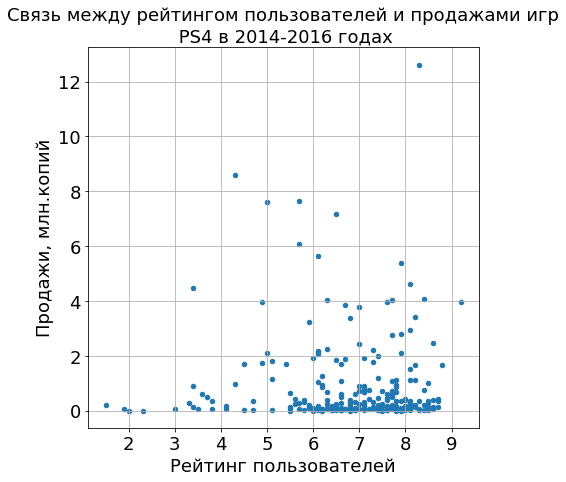

In [59]:
ps4_actual.plot(x='user_score',y='world_sales', kind='scatter', figsize=(7,7), grid=True)
plt.title('Связь между рейтингом пользователей и продажами игр\n PS4 в 2014-2016 годах', fontsize=18)
plt.xlabel('Рейтинг пользователей', fontsize=18)
plt.ylabel('Продажи, млн.копий', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [60]:
print('Коэффициент корреляции:', ps4_actual['user_score'].corr(ps4_actual['world_sales']))

Коэффициент корреляции: -0.04013158947269733


**Судя по полученному коэффициенту корреляции, рейтинг игр на PS4 по отзывам пользователей является еще менее достоверным предиктором продаж, чем рейтинг критиков. Связь между рейтингом пользователей и продажами фактически отсутствует: есть много игр с высоким рейтингом и невысокими продажами, но также есть игры с низким рейтингом и очень большими продажами. Возможно, это связано с тем, что отзывы на игры оставляют люди, очень увлеченные игровой индустрией в целом и их вкусы и предпочтения могут не отражать предпочтения основной массы потребителей игрового контента. Или, например, потребителями могут быть дети или подростки, а отзывы будут писать скорее взрослые люди** 

### Влияние отзывов пользователей и критиков на продажи игр в 2016 году на других платформах

**Построим диаграммы рассеяния и вычислим коэффициенты корреляции между отзывами критиков и продажами игр, а также между отзывами пользователей и продажами игр для всех других платформ, представленных на рынке в 2014-2016 годах, кроме PS4:**

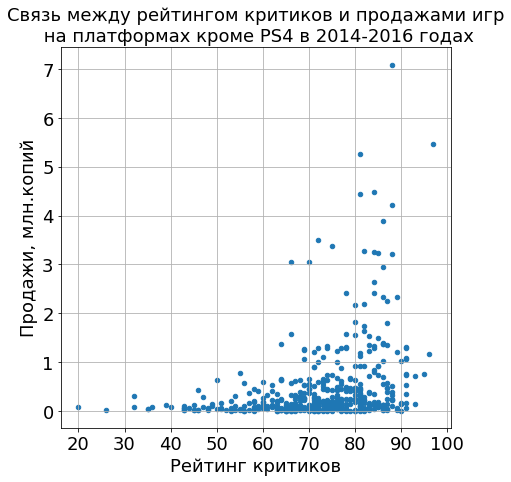

In [61]:
other_actual = df_actual.query('platform != "PS4"')
other_actual.plot(x='critic_score',y='world_sales', kind='scatter', figsize=(7,7), grid=True)
plt.title(f'Связь между рейтингом критиков и продажами игр\n на платформах кроме PS4 в 2014-2016 годах', fontsize=18)
plt.xlabel('Рейтинг критиков', fontsize=18)
plt.ylabel('Продажи, млн.копий', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [62]:
print('Коэффициент корреляции:', other_actual['critic_score'].astype('float').corr(other_actual['world_sales']))

Коэффициент корреляции: 0.3094740026001153


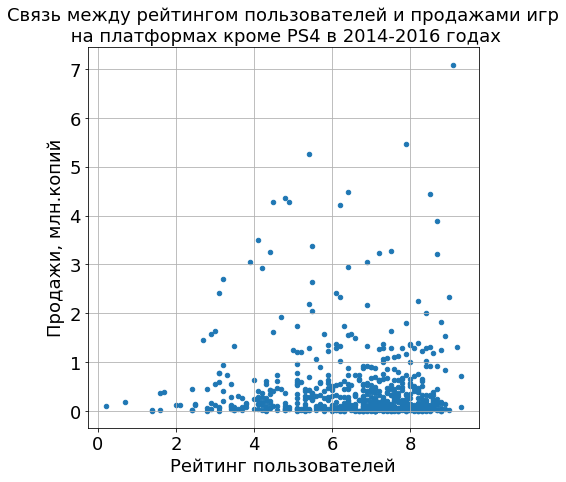

In [63]:
other_actual.plot(x='user_score',y='world_sales', kind='scatter', figsize=(7,7), grid=True)
plt.title('Связь между рейтингом пользователей и продажами игр\n на платформах кроме PS4 в 2014-2016 годах', fontsize=18)
plt.xlabel('Рейтинг пользователей', fontsize=18)
plt.ylabel('Продажи, млн.копий', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [64]:
print('Коэффициент корреляции:', other_actual['user_score'].corr(other_actual['world_sales']))

Коэффициент корреляции: -0.023478187237975554


**Полученный результат показывает, что и в целом по рынку игр и платформ, рейтинги критиков и рейтинги пользователей являются плохими предикторами продаж** 

### Жанры игр и их прибыльность

**Рассмотрим, как в 2014-2016 годах игры были распределены по жанрам и какие жанры оказались наиболее прибыльными по мировым продажам:**

In [65]:
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01


In [66]:
genres_count = df_actual.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)
genres_count.columns=['count']
genres_count

,count
genre,
Action,619
Role-Playing,221
Adventure,185
Sports,161
Shooter,128
Misc,113
Racing,69
Fighting,60
Simulation,44


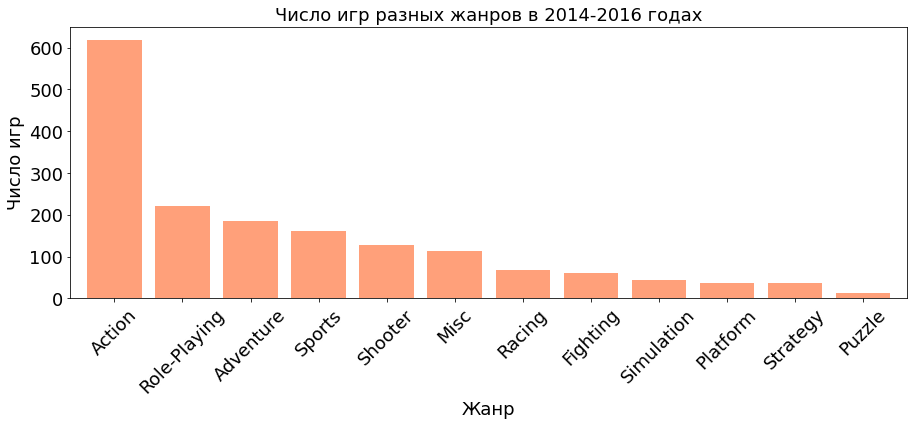

In [67]:
genres_count.plot(kind='bar', figsize=(15,5), grid=False, width=0.8, legend = False, color='lightsalmon')

plt.xlabel('Жанр', fontsize=18)
plt.ylabel('Число игр', fontsize=18)
plt.title('Число игр разных жанров в 2014-2016 годах', fontsize=18)
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
plt.show()

In [68]:
genres_sales = df_actual.pivot_table(index='genre', values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False)
genres_sales

,world_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


**Рассчитаем долю игр каждого жанра в продажах за 2016 год:**

In [69]:
genres_sales_share = genres_sales/genres_sales.sum()

In [70]:
genres_sales_share

,world_sales
genre,
Action,0.273302
Shooter,0.234341
Sports,0.150086
Role-Playing,0.139064
Misc,0.051477
Fighting,0.038687
Racing,0.037727
Platform,0.024800
Adventure,0.024059


**Объединим жанры c Fighting до Puzzle в категорию Others:**

In [71]:
genres_sales_share.loc['Others',:] = genres_sales_share.loc['Fighting':'Puzzle',:].sum()

**Удалим строки c Fighting до Puzzle:**

In [72]:
genres_sales_share = genres_sales_share.drop(['Fighting', 'Racing', 'Platform', 'Adventure', 'Simulation', 'Strategy','Puzzle'])
genres_sales_share

,world_sales
genre,
Action,0.273302
Shooter,0.234341
Sports,0.150086
Role-Playing,0.139064
Misc,0.051477
Others,0.151731


**Построим круговую диаграмму, отражающую долю жанров в общих продажах:**

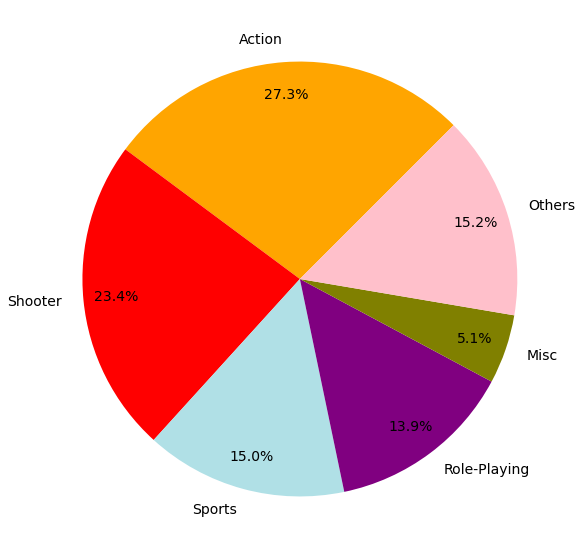

In [73]:
colors = ['orange', 'red', 'powderblue', 'purple', 'olive', 'pink']
plt.pie(genres_sales_share['world_sales'], labels=genres_sales_share.index, autopct='%1.1f%%', radius=1, pctdistance=0.85, textprops={'fontsize': 14, 'color': 'black'}, startangle = 45, rotatelabels = False, colors=colors)
plt.show()

**Больше всего продаж игр в 2014-2016 годах пришлось на долю жанра Action (27.3%), несколько меньше - на доли жанров Shooter (23.4%), Sports (15.0%) и Role-Playing (13.9%). Доли остальных жанров не превышают 5.1 %. Наименее популярным жанром оказался Puzzle. В 2014-2016 годах, как видно из графика распределения игр по жанрам из пункта 1.3.6, продавалось только 14 игр Puzzle. На круговой диаграмме они оказались в общем блоке "Others" вместе с играми Fighting, Racing, Platform, Adventure, Simulation и Strategy**  

## "Портреты" пользователей из Северной Америки, Европы и Японии

**В этом пункте оценим, какие платформы наиболее популярны среди пользователей из Северной Америки, Европы и Японии, каковы самые популярные жанры игр  и влияет ли рейтинг ESRB на продажи в этих регионах**

<a id='user_portrait'></a>

### Топ-5 платформ для регионов NA, EU и JP

**Сформируем сводную таблицу `platform_na` по данным пользователей из Северной Америки за 2014-2016 годы, в которой будут отражены суммарные продажи в данном регионе для каждой платформы:**

In [74]:
platform_na = df_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
platform_na

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


**Найдем доли пяти самых популярных игровых платформ в Северной Америке в 2016 году:**

In [75]:
platform_na.loc['Others',:] = platform_na.loc['WiiU':'PSP',:].sum() #суммируем продажи для наименее популярных платформ и записываем в строку Others 
platform_na = platform_na.drop(['WiiU', 'PC', 'PSV','Wii','PSP'])  #удаляем строки с наименее популярными платформами
platform_na = platform_na/platform_na.sum() # находим долю каждой платформы в суммарных продажах 
platform_na

,na_sales
platform,
PS4,0.347145
XOne,0.286102
X360,0.099627
3DS,0.079701
PS3,0.077624
Others,0.109801


**Повторим те же действия для регионов EU и JP:**

In [76]:
platform_eu = df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
platform_eu

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


In [77]:
platform_eu.loc['Others',:] = platform_eu.loc['X360':'PSP',:].sum() #суммируем продажи для наименее популярных платформ и записываем в строку Others 
platform_eu = platform_eu.drop(['X360', 'WiiU', 'PSV','Wii','PSP'])  #удаляем строки с наименее популярными платформами
platform_eu = platform_eu/platform_eu.sum() # находим долю каждой платформы в суммарных продажах 
platform_eu

,eu_sales
platform,
PS4,0.480420
XOne,0.170866
PS3,0.094355
PC,0.066388
3DS,0.059554
Others,0.128417


In [78]:
platform_jp = df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
platform_jp

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
PSP,0.36
XOne,0.32
X360,0.08
PC,0.00


In [79]:
platform_jp.loc['Others',:] = platform_jp.loc['PSP':'Wii',:].sum() #суммируем продажи для наименее популярных платформ и записываем в строку Others 
platform_jp = platform_jp.drop(['PSP','XOne', 'PC', 'X360', 'PC', 'Wii'])  #удаляем строки с наименее популярными платформами
platform_jp = platform_jp/platform_jp.sum() # находим долю каждой платформы в суммарных продажах 
platform_jp

,jp_sales
platform,
3DS,0.475239
PS4,0.161349
PSV,0.156193
PS3,0.120529
WiiU,0.078526
Others,0.008164


**Построим круговые диаграммы, отражающие доли самых популярных игровых платформ в Северной Америке, Европе и Японии:**

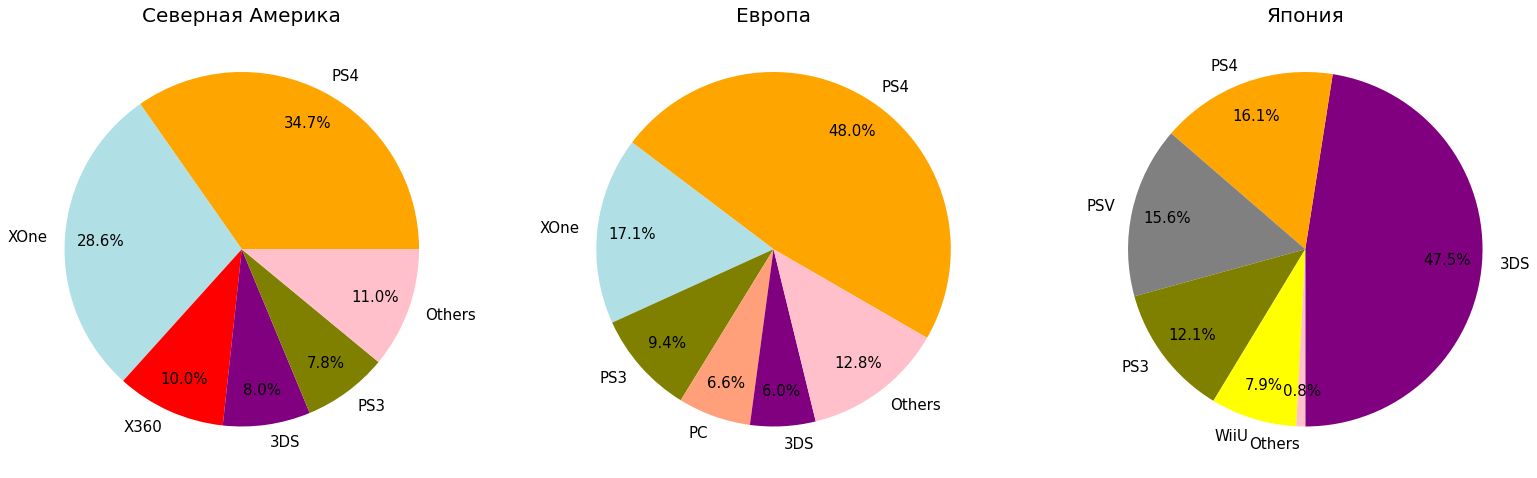

In [80]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(27,30))

colors_na = ['orange', 'powderblue', 'red', 'purple', 'olive', 'pink']

ax1.pie(platform_na['na_sales'], labels=platform_na.index, autopct='%1.1f%%', radius=1, pctdistance=0.8, textprops={'fontsize': 15}, startangle = 0, rotatelabels = False, colors = colors_na)
ax1.set_title('Северная Америка', fontsize=20)

colors_eu = ['orange', 'powderblue', 'olive', 'lightsalmon', 'purple', 'pink']

ax2.pie(platform_eu['eu_sales'], labels=platform_eu.index, autopct='%1.1f%%', radius=1, pctdistance=0.8, textprops={'fontsize': 15}, startangle = -30, rotatelabels = False, colors = colors_eu)
ax2.set_title('Европа', fontsize=20)

colors_jp = ['purple', 'orange', 'grey', 'olive', 'yellow', 'pink']

ax3.pie(platform_jp['jp_sales'], labels=platform_jp.index, autopct='%1.1f%%', radius=1, pctdistance=0.8, textprops={'fontsize': 15},startangle = -90, rotatelabels = False, colors = colors_jp)
ax3.set_title('Япония', fontsize=20)
plt.show()

**В Северной Америке и Европе две самые популярные игровые платформы в 2014-2016 годах - PS4 (34.7 и 48.0% соответственно) и XOne (28.6 и 17.1 %). Эти платформы покрывают около 2/3 всего рынка компьютерных игр в данных регионах. В Северной Америке оставшаяся 1/3 рынка примерно равномерно разделена между платформами X360, 3DS, PS3 и другими. В Европе в топ-5 также вошли PS3 (9.4%) и 3DS (6.0%). Кроме того, в рейтинг топ-5 Европы вошла платформа PC (6.6%). В Японии картина сильно отличается - там доминирует 3DS (47.5%), на втором месте - PS4 (16.1%), на третьем PSV (15.6%). Четвертое и пятое место в Японии делят PS3 и WiiU (12.1 и 7.9%).** 

**Полученные результаты говорят о том, что пользователи в Европе и Северной Америке отдают предпочтение играм для стационарных игровых консолей (PS4, XOne),тогда как в Японии больше 60% продаваемых игр, это игры для портативных консолей (3DS и PSV). О том, что Японцы предпочитают портативность говорит и то, что в рейтинге самых популярных игровых платформ Японии отсутствует самая стационарная из всех платформ - PC, тогда как в Европе она все-таки попадает в рейтинг. По-видимому, выявленные различия связаны с культурными и бытовыми особенностями рассмотренных регионов**    

### Жанровые предпочтения пользователей в Северной Америке, Европе и Японии

**В этом пункте определеим топ-5 популярных жанров в NA, EU и JP**

**Создадим сводную таблицу с продажами игр разных жанров в регионе NA:**

In [81]:
genre_na = df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
genre_na

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
Fighting,12.43
Racing,8.74
Platform,6.79
Adventure,5.64


**Рассчитаем доли самых популярных жанров в NA:**

In [82]:
genre_na.loc['Others',:] = genre_na.loc['Fighting':'Puzzle',:].sum() #суммируем продажи для наименее популярных жанров и записываем в строку Others 
genre_na = genre_na.drop(['Fighting','Racing', 'Platform', 'Adventure','Simulation','Strategy','Puzzle'])  #удаляем строки с наименее популярными жанрами
genre_na = genre_na/genre_na.sum() # находим долю каждого жанра в суммарных продажах 
genre_na

,na_sales
genre,
Shooter,0.278181
Action,0.255333
Sports,0.162395
Role-Playing,0.117827
Misc,0.052982
Others,0.133282


**Повторим расчеты для регионов EU и JP:**

In [83]:
genre_eu = df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
genre_eu

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
Misc,12.86
Simulation,7.30
Platform,6.80
Fighting,6.69


In [84]:
genre_eu.loc['Others',:] = genre_eu.loc['Misc':'Puzzle',:].sum() #суммируем продажи для наименее популярных жанров и записываем в строку Others 
genre_eu = genre_eu.drop(['Misc', 'Simulation', 'Platform', 'Fighting', 'Adventure', 'Strategy', 'Puzzle'])  #удаляем строки с наименее популярными жанрами
genre_eu = genre_eu/genre_eu.sum() # находим долю каждого жанра в суммарных продажах 
genre_eu

,eu_sales
genre,
Action,0.275898
Shooter,0.242057
Sports,0.168945
Role-Playing,0.104071
Racing,0.052202
Others,0.156827


In [85]:
genre_jp = df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
genre_jp

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
Adventure,3.60
Sports,3.26
Platform,2.69
Simulation,2.31


In [86]:
genre_jp.loc['Others',:] = genre_jp.loc['Adventure':'Puzzle',:].sum() #суммируем продажи для наименее популярных жанров и записываем в строку Others 
genre_jp = genre_jp.drop(['Adventure', 'Sports', 'Platform', 'Simulation', 'Racing', 'Strategy', 'Puzzle'])  #удаляем строки с наименее популярными жанрами
genre_jp = genre_jp/genre_jp.sum() # находим долю каждого жанра в суммарных продажах 
genre_jp

,jp_sales
genre,
Role-Playing,0.334730
Action,0.317757
Fighting,0.068428
Misc,0.060264
Shooter,0.052315
Others,0.166506


**Построим круговые диаграммы с самыми популярными жанрами игр по регионам:**

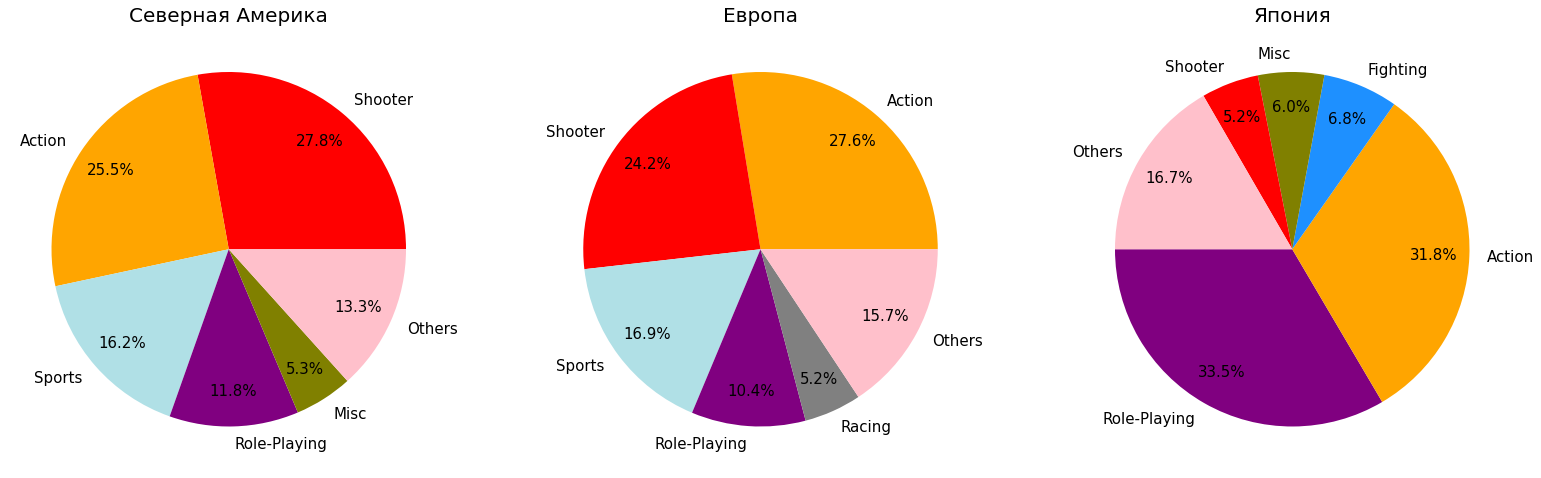

In [87]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(27,30))

colors_na = ['red', 'orange', 'powderblue', 'purple', 'olive', 'pink']

ax1.pie(genre_na['na_sales'], labels=genre_na.index, autopct='%1.1f%%', radius=1, pctdistance=0.8, textprops={'fontsize': 15}, startangle = 0, rotatelabels = False, colors = colors_na)
ax1.set_title('Северная Америка', fontsize=20)

colors_eu = ['orange', 'red', 'powderblue', 'purple', 'grey', 'pink']

ax2.pie(genre_eu['eu_sales'], labels=genre_eu.index, autopct='%1.1f%%', radius=1, pctdistance=0.8, textprops={'fontsize': 15}, startangle = 0, rotatelabels = False, colors = colors_eu)
ax2.set_title('Европа', fontsize=20)

colors_jp = ['purple', 'orange', 'dodgerblue', 'olive', 'red', 'pink']

ax3.pie(genre_jp['jp_sales'], labels=genre_jp.index, autopct='%1.1f%%', radius=1, pctdistance=0.8, textprops={'fontsize': 15},startangle = -180, rotatelabels = False, colors = colors_jp)
ax3.set_title('Япония', fontsize=20)
plt.show()

**Как и в случае с игровыми платформами, распределения самых популярных жанров игр обнаруживают значительные сходства у пользователей из Северной Америки и Европы. В обоих регионах самыми популярными являются игры жанра Shooter и Action, которые составляют более 50% всех продаваемых игр. Третье и четвертое места рейтинга в Европе и Америке делят игры в жанре Sports и Role Playing (~16-17 и 10-12%, соответственно). На пятом месте в Северной Америке игры Misc, в Европе - Racing.** 

**Япония очень сильно отличается от Европы и Америки по жанровым предпочтениям игр - на первом месте здесь Role-Playing (33.5%), на втором Action (31.8%). Третье, четвертое и пятое места занимают с очень близкими друг к другу процентами игры в жанрах Fighting, Misc и Shooter (6.8, 6.0 и 5.2 %, соответственно). Четыре главных отличия японского рынка компьютерных игр от европейского и североамериканского: 1)  низкая популярность игр в жанре Shooter; 2) японцы почти не покупают игры в жанре Sports; 3) у них почти втрое популярнее чем в Европе и Америке Role-Playing игры; 4) в топ-5 на четвертом месте в Японии игры Fighting, которые неактуальны для Европы и Северной Америки.**  

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [88]:
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01


In [89]:
df_actual_by_rating = df_actual.groupby(['rating']).agg({'na_sales':'sum', 'eu_sales':'sum','jp_sales':'sum'}).sort_values(by='rating')
df_actual_by_rating

,na_sales,eu_sales,jp_sales
rating,,,
E,50.74,58.06,8.94
E10+,33.23,26.16,4.46
M,96.42,93.44,8.01
T,38.95,34.07,14.78
unknown,64.72,58.95,56.90


**Вспомним, что значат рейтинги ESRB:**

E - для всех возрастных категорий

E10+ - для лиц старше 10 лет

T - для лиц старше 13 лет

M - для лиц старше 17 лет

In [90]:
df_actual_by_rating.loc['sum',:] = df_actual_by_rating.sum()
df_actual_by_rating

,na_sales,eu_sales,jp_sales
rating,,,
E,50.74,58.06,8.94
E10+,33.23,26.16,4.46
M,96.42,93.44,8.01
T,38.95,34.07,14.78
unknown,64.72,58.95,56.90
sum,284.06,270.68,93.09


In [91]:
df_actual_by_rating_share=df_actual_by_rating/df_actual_by_rating.loc['sum',:]
df_actual_by_rating_share = df_actual_by_rating_share.drop(['sum'])*100

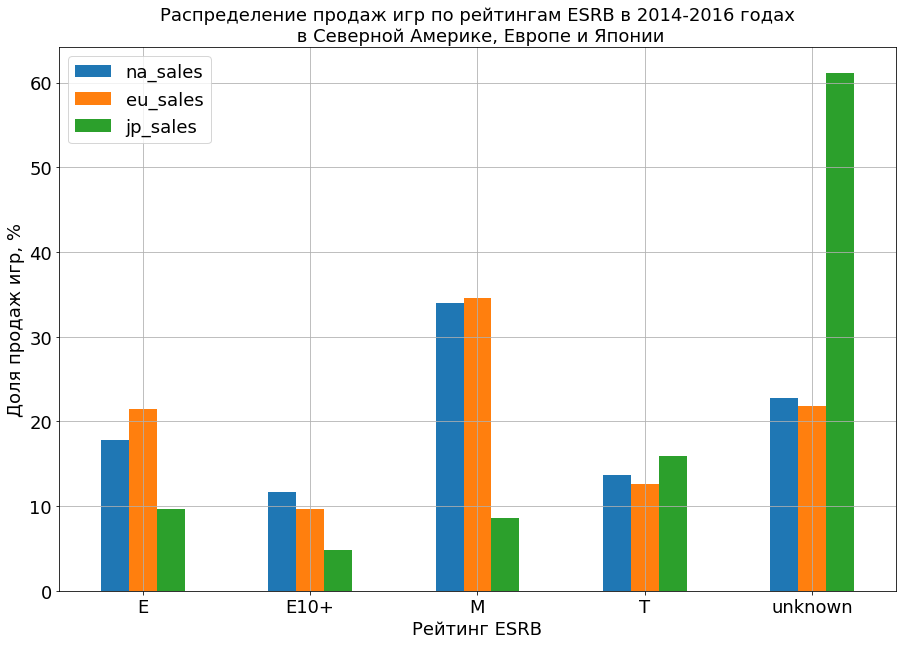

In [92]:
df_actual_by_rating_share.plot(kind='bar', grid=True)
plt.xlabel('Рейтинг ESRB', fontsize=18)
plt.ylabel('Доля продаж игр, %', fontsize=18)
plt.title('Распределение продаж игр по рейтингам ESRB в 2014-2016 годах\n в Северной Америке, Европе и Японии', fontsize=18)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.show()

**В 2014-2016 годах в Европе и Северной Америке продавалось около 20% игр с неизвестным рейтингом ESRB, тогда как в Японии этот процент был гораздо выше - более 60%.** 

**В целом данные о рейтинге ESRB в Европе и Америке лишь подтверждают популярность в этих регионах шутеров, которые обычно имеют более строгий возрастной ценз, чем другие игры.**

**Сделать вывод о том, как реально распределены рейтинги игр в Японии не представляется возможным, поскольку 60% игр в этом регионе не маркируется ESRB (скорее всего в Японии есть свои рейтинги для маркировки игр). Принимая во внимание довольно низкую популярность шутеров в Японии, можно предположить, что процент продаваемых там игр с рейтингом M, если бы игры там маркировались, оказлся бы ниже, чем в Европе или Америке. В целом, маловероятно, что рейтинг ESRB оказывает сильное влияние на выбор покупателями игр, скорее наоборот - доминирующий в регионе рейтинг ESRB просто отражает вкусы аудитории этого региона.**

## Проверка гипотез

### Гипотеза 1: Пользовательские рейтинги платформ Xbox One и PC не различаются

**Сформируем две выборки: `xone_rating_actual` - рейтинги игр, вышедших на платформе XOne, `pc_rating_actual` - рейтинги игр на PC. Удалим из них значения NaN и применим метод `.describe()`, чтобы оценить основные параметры этих выборок.**

In [93]:
xone_rating_actual = df_actual.query('platform == "XOne"')['user_score']
xone_rating_actual = xone_rating_actual.dropna()
xone_rating_actual.describe()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [94]:
pc_rating_actual = df_actual.query('platform == "PC"')['user_score']
pc_rating_actual = pc_rating_actual.dropna()
pc_rating_actual.describe()

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

**Выборки имеют разный размер: 165 и 122 значения, соответственно. Медианы совпадают, средние значения несколько различаются. Построим распределения пользовательсикх рейтингов для обеих платформ:**

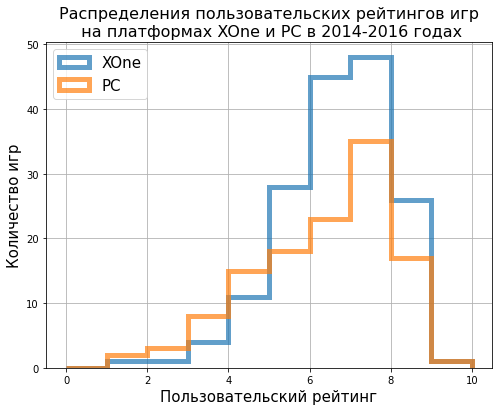

In [95]:
ax=xone_rating_actual.plot(kind='hist', y='duration', histtype='step', range=(0,10), bins=10, linewidth=5, alpha=0.7, label='XOne', figsize=(8,6))
pc_rating_actual.plot(kind='hist', y='duration', histtype='step', range=(0,10), bins=10, linewidth=5, alpha=0.7, label='PC', ax=ax, grid=True, legend = True)
plt.xlabel('Пользовательский рейтинг', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.title('Распределения пользовательских рейтингов игр\n на платформах XOne и PC в 2014-2016 годах', fontsize=16)
plt.legend(['XOne', 'PC'], loc='upper left', fontsize=15)
plt.show()

**Распределения похожи по форме, однако явно отличаются от нормального - имеют пик, смещенный вправо и длинный "хвост" слева. При таких распределениях имеет смысл сравнивать не средние значения выборок, а проверять, принадлежат ли эти выборки одному распределению. Используем непараметрический тест Манна-Уитни для независимых выборок со следующими гипотезами:**
- нулевая гипотеза - распределения пользовательских рейтингов для платформ XOne и PC одинаковые
- альтернативная гипотеза - распределения пользовательских рейтингов XOne и PC различаются (двухсторонняя альтернативная гипотеза)

In [96]:
st.mannwhitneyu(xone_rating_actual, pc_rating_actual, alternative='two-sided')

MannwhitneyuResult(statistic=10820.0, pvalue=0.27752869727762175)

**Получили значение pvalue ~= 0.28, что больше чем любые из общепринятых уровней статистической значимости alpha = 0.05, 0.01. Поэтому мы не отвергаем нулевую гипотезу. Таким образом, распределения пользовательских рейтингов для платформ Xone и PC не различаются**

In [97]:
st.ttest_ind(xone_rating_actual, pc_rating_actual, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=1.577760647447497, pvalue=0.11601398086668835)

**Тест Стьюдента с двухсторонней альтернативной гипотезой также показывает отсутствие достоверных различий пользовательских рейтингов XOne и PC: p-value ~= 0.12, что больше чем alpha=0.05**

In [98]:
print('Среднее значение пользовательского рейтинга игр на платформе XOne:', xone_rating_actual.mean().round(1))
print('Среднее значение пользовательского рейтинга игр на платформе PC:', pc_rating_actual.mean().round(1))

Среднее значение пользовательского рейтинга игр на платформе XOne: 6.6
Среднее значение пользовательского рейтинга игр на платформе PC: 6.3


### Гипотеза 2: Пользовательские рейтинги жанров Action и Sports различаются

**По примеру проверки предыдущей гипотезы сформируем выборки для сравнения: `action_rating_20016` и `sports_rating_2016`**

In [99]:
action_rating_actual = df_actual.query('genre == "Action"')['user_score']
action_rating_actual = action_rating_actual.dropna()
action_rating_actual.describe()

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [100]:
sports_rating_actual = df_actual.query('genre == "Sports"')['user_score']
sports_rating_actual = sports_rating_actual.dropna()
sports_rating_actual.describe()

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

**Количество игр в жанре Action с пользовательским рейтингом более чем в два раза превышает количество игр в жанре Sports. Т.е. размер выборок сильно различается. И медианные, и средние значения рейтинга для Sports ниже по абсолютной величине, чем для Action. Построим распределения:**

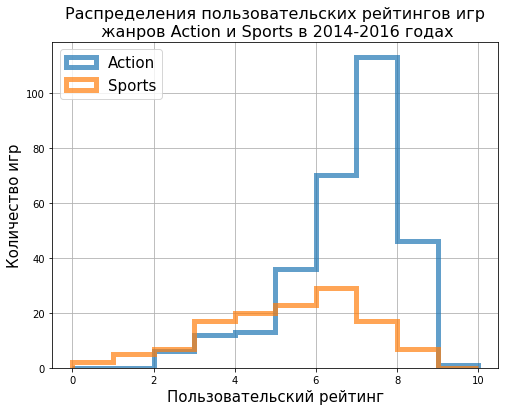

In [101]:
ax=action_rating_actual.plot(kind='hist', y='duration', histtype='step', range=(0,10), bins=10, linewidth=5, alpha=0.7, label='Action', figsize=(8,6))
sports_rating_actual.plot(kind='hist', y='duration', histtype='step', range=(0,10), bins=10, linewidth=5, alpha=0.7, label='Sports', ax=ax, grid=True, legend = True)
plt.xlabel('Пользовательский рейтинг', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
plt.title('Распределения пользовательских рейтингов игр\n жанров Action и Sports в 2014-2016 годах', fontsize=16)
plt.legend(['Action', 'Sports'], loc='upper left', fontsize=15)
plt.show()

**Распределения выглядят по-разному, и по виду оба далеки от нормального. Размеры выборок тоже разные, поэтому снова применим непараметрический тест Манна-Уитни для независимых выборок. Сформулируем гипотезы:**
- нулевая гипотеза - распределения пользовательских рейтингов для жанров Action и Sports одинаковые (рейтинги не различаются)
- альтернативная гипотеза - распределения пользовательских рейтингов для жанров Action и Sports различаются (т.е. рейтинги различаются). Таким образом, альтернативная гипотеза двухсторонняя.

In [102]:
st.mannwhitneyu(action_rating_actual, sports_rating_actual, alternative='two-sided')

MannwhitneyuResult(statistic=28428.5, pvalue=1.2166879280294303e-16)

**Получили значение p-value существенно меньше чем alpha=0.05 и 0.01. Таким образом, мы не принимаем нулевую гипотезу о том, что распределения рейтингов жанров Action и Sports одинаковые, и принимаем альтернативную гипотезу - распределение для жанра Action отличается от распределения Sports**

**Выполним тест Стьюдента**

**Нулевая гипотеза:** средние значения рейтингов Action и Sports не различаются

**Альтернативная гипотеза:** средние значения рейтингов Action и Sports различаются 

In [103]:
st.ttest_ind(action_rating_actual, sports_rating_actual, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=8.384614718486121, pvalue=1.1825550382644557e-14)

**Как и в случае теста Манна-Уитни, проверка тестом Стьюдента показала, что нам следует принять альтернативную гипотезу - средние значения рейтингов Action и Sports различаются.**

In [104]:
print('Среднее значение пользовательского рейтинга игр в жанре Action:', action_rating_actual.mean().round(1))
print('Среднее значение пользовательского рейтинга игр в жанре Sports:', sports_rating_actual.mean().round(1))

Среднее значение пользовательского рейтинга игр в жанре Action: 6.8
Среднее значение пользовательского рейтинга игр в жанре Sports: 5.2


## Выводы

**1. Наиболее перспективными из имеющихся на рынке в 2014-2016 г игровых платформ для регионов NA и EU представляются игры для стационарных игровых платформ PS4 и XOne. Не смотря на то, что платформа X360 присутствует в рейтинге топ-5 платформ Северной Америки, а PS3 присутствуют в рейтинге обоих регионов, учитывая характерное время жизни игровых платформ, можно предположить что в 2017 году доля продаж игр для X360 и PS3 будет снижаться.**

**2. Единственной портативной игровой платформой, которая вошла в рейтинг в странах NA и EU является 3DS. К 2016-му году она присутствовует на рынке 6 лет, и, учитывая характерное время жизни игровых платформ в 8-12 лет, вполне вероятно будет присутствовать в 2017 году**

**3. Платформа PC входит в рейтинг топ-5 игровых платформ только в Европе. Учитывая, что она присутствует на рынке уже более 25 лет и для нее продолжают выпускаться финансово успешные игры, можно с уверенностью предположить, что она будет актуальна для Европейского рынка и в 2017 году**

**4. Для рынка Японии самую большую долю продаж составляют игры для портативных платформ - (3DS, PSV, WiiU - суммарно более 60% продаж), и меньшую долю - станционарные консоли (PS4, PS3). Можно предположить, что все перечисленные платформы, за исключением PS3, которая приближается к завершению своего жизненного цикла, будут продолжать занимать значительные доли рынка в Японии.**

**5. В Японском сегменте рынка совсем не популярны платформы XOne и PC, что следует учесть при планировании продаж и рекламных кампаний на 2017 год.**    

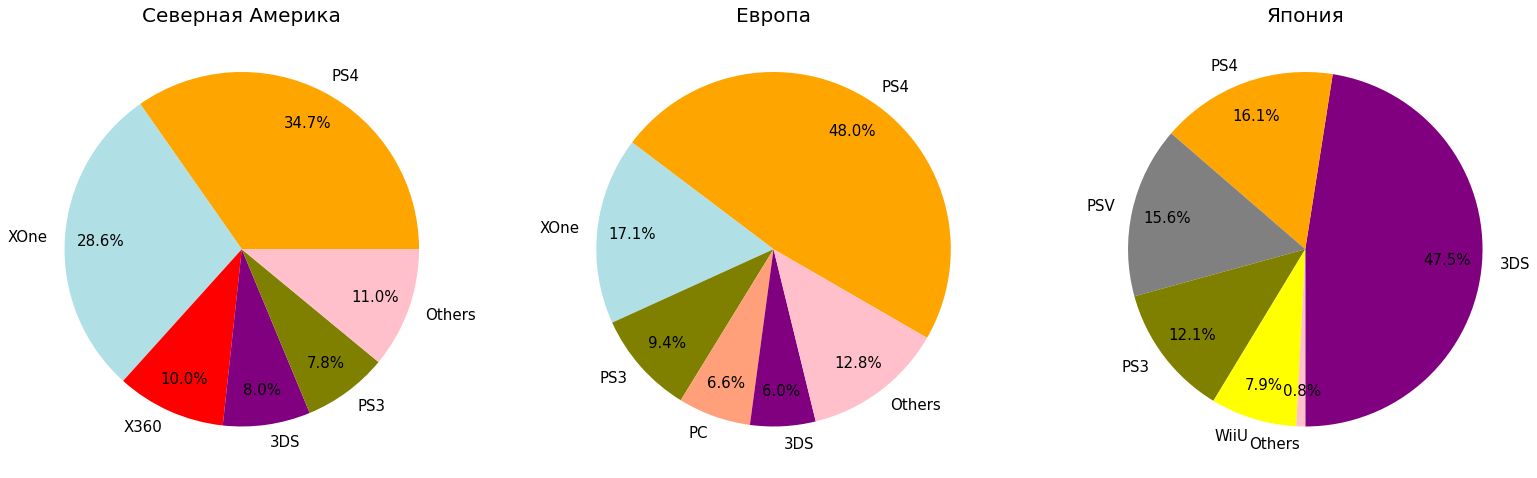

In [105]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(27,30))

colors_na = ['orange', 'powderblue', 'red', 'purple', 'olive', 'pink']

ax1.pie(platform_na['na_sales'], labels=platform_na.index, autopct='%1.1f%%', radius=1, pctdistance=0.8, textprops={'fontsize': 15}, startangle = 0, rotatelabels = False, colors = colors_na)
ax1.set_title('Северная Америка', fontsize=20)

colors_eu = ['orange', 'powderblue', 'olive', 'lightsalmon', 'purple', 'pink']

ax2.pie(platform_eu['eu_sales'], labels=platform_eu.index, autopct='%1.1f%%', radius=1, pctdistance=0.8, textprops={'fontsize': 15}, startangle = -30, rotatelabels = False, colors = colors_eu)
ax2.set_title('Европа', fontsize=20)

colors_jp = ['purple', 'orange', 'grey', 'olive', 'yellow', 'pink']

ax3.pie(platform_jp['jp_sales'], labels=platform_jp.index, autopct='%1.1f%%', radius=1, pctdistance=0.8, textprops={'fontsize': 15},startangle = -90, rotatelabels = False, colors = colors_jp)
ax3.set_title('Япония', fontsize=20)
plt.show()

**6. Глобальный рынок 2014-2016 годов демонстрирует самый большой интерес к играм трех жанров - Action (27.3%), Shooter (23.4%) и Sports (15.0%). Также достаточно высока популярность игр в жанре Role-Playing (13.9%). Замыкают пятерку самых популярных жанров игры Misc (5.1%). Игры всех других жанров составляют около 15% глобальных продаж. Можно предположить, что в 2017 году эти тенденции будут сохраняться**

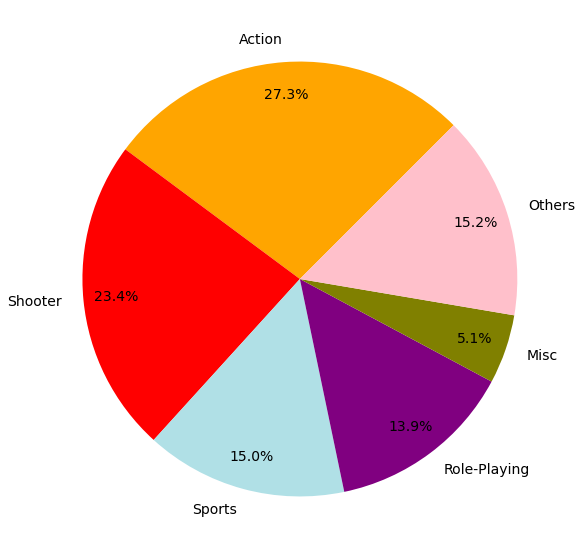

In [106]:
colors = ['orange', 'red', 'powderblue', 'purple', 'olive', 'pink']
plt.pie(genres_sales_share['world_sales'], labels=genres_sales_share.index, autopct='%1.1f%%', radius=1, pctdistance=0.85, textprops={'fontsize': 14, 'color': 'black'}, startangle = 45, rotatelabels = False, colors=colors)
plt.show()

**7. Следует учитывать, что глобальные жанровые предпочтения определяются преимущественно пользователями из Европы и Севрной Америки. Рынок Японии демонстрирует очень своеобразные тенденции жанровых предпочтений. На это необходимо обратить внимание при планировании рекламных кампаний в данном регионе. Четыре главных отличия японского рынка компьютерных игр от европейского и североамериканского:** 

1) Низкая популярность игр в жанре Shooter; 
2) Японцы почти не покупают игры в жанре Sports; 
3) У них почти втрое популярнее чем в Европе и Америке Role-Playing игры; 
4) В топ-5 на четвертом месте в Японии игры Fighting, которые неактуальны для Европы и Северной Америки.

**Указанные особенности Японского рынка можно обнаружить, сравнивая круговые гистограммы с распределением жанровых предпочтений по регионам, представленные ниже:**

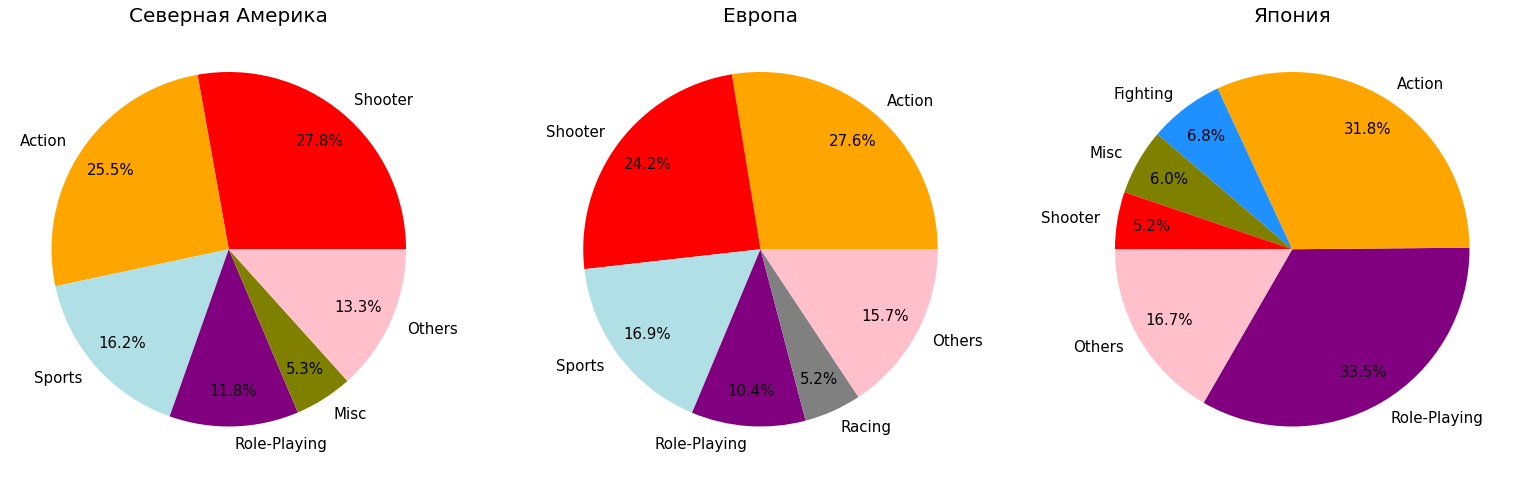

In [107]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(27,30))

colors_na = ['red', 'orange', 'powderblue', 'purple', 'olive', 'pink']

ax1.pie(genre_na['na_sales'], labels=genre_na.index, autopct='%1.1f%%', radius=1, pctdistance=0.8, textprops={'fontsize': 15}, startangle = 0, rotatelabels = False, colors = colors_na)
ax1.set_title('Северная Америка', fontsize=20)

colors_eu = ['orange', 'red', 'powderblue', 'purple', 'grey', 'pink']

ax2.pie(genre_eu['eu_sales'], labels=genre_eu.index, autopct='%1.1f%%', radius=1, pctdistance=0.8, textprops={'fontsize': 15}, startangle = 0, rotatelabels = False, colors = colors_eu)
ax2.set_title('Европа', fontsize=20)

colors_jp = ['purple', 'orange', 'dodgerblue', 'olive', 'red', 'pink']

ax3.pie(genre_jp['jp_sales'], labels=genre_jp.index, autopct='%1.1f%%', radius=1, pctdistance=0.8, textprops={'fontsize': 15},startangle = -120, rotatelabels = False, colors = colors_jp)
ax3.set_title('Япония', fontsize=20)
plt.show()

**8. Пользовательские рейтинги игр не могут быть использованы в качестве индикатора продаж, т.к. по результатам проведенного анализа они не коррелируют с продажами**

**9. Рейтинги критиков имеют слабую положительную корреляцию с продажами. В целом, по рейтингу критиков можно лишь судить о том, есть ли у конкретной игры шанс стать очень популярной или нет. "Пороговый" рейтинг критиков в данном случае составляет около 70%. Т.е. игры, которые достигли такого рейтинга имеют некоторый шанс на высокие продажи.**

**10. В 2014-2016 годах в Европе и Северной Америке продавалось около 20% игр с неизвестным рейтингом ESRB, тогда как в Японии этот процент был гораздо выше - более 60%. В целом данные о рейтинге ESRB в Европе и Америке лишь подтверждают популярность в этих регионах шутеров, которые обычно имеют более строгий возрастной ценз, чем другие игры (рейтинг M). Сделать вывод о том, как реально распределены рейтинги игр в Японии не представляется возможным, поскольку 60% игр в этом регионе не маркируется ESRB (скорее всего в Японии есть свои рейтинги для маркировки игр). Принимая во внимание довольно низкую популярность шутеров в Японии, можно предположить, что процент продаваемых там игр с рейтингом M, если бы игры там маркировались, был бы ниже, чем в Европе или Америке. В целом, маловероятно, что рейтинг ESRB оказывает сильное влияние на выбор покупателями игр, скорее наоборот - доминирующий в регионе рейтинг ESRB просто отражает вкусы аудитории этого региона.**

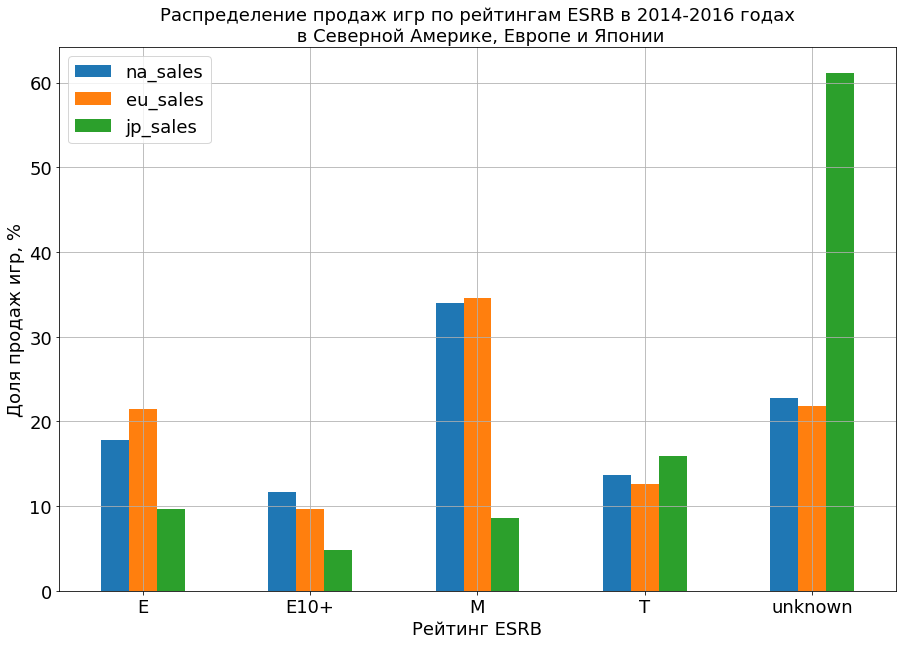

In [108]:
df_actual_by_rating_share.plot(kind='bar', grid=True)
plt.xlabel('Рейтинг ESRB', fontsize=18)
plt.ylabel('Доля продаж игр, %', fontsize=18)
plt.title('Распределение продаж игр по рейтингам ESRB в 2014-2016 годах\n в Северной Америке, Европе и Японии', fontsize=18)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.show()

**11. Характерное время жизни популярных игровых платформ по историческим данным составляет 8-12 лет. По этой причине платформы X360, PS3 и Wii, которые к 2016 году уже находятся на рынке не менее 11 лет, вероятнее всего утратят свою популярность в последующие годы. Утверждение о времени жизни игровых платформ не распространяется на платформу PC, поскольку она является не только игровой, но и рабочей, и в отличие от других платформ не утрачивает свою популярность уже более 25 лет. Можно ожидать, что продажи игр для PC будут относительно стабильны в ближайшие годы.**

**12. Проверка статистических гипотез показала, что на глобальном рынке пользовательские рейтинги игр на XOne и PC достоверно не различаются (средние значения 6.6 и 6.3, соответственно), а рейтинги игр жанров Action и Sports различаются (средние значения 6.8 и 5.2, соответственно).**